<a href="https://colab.research.google.com/github/LailaBulh/Programacion---Claas-Files/blob/main/practicasregresionlasso_ridge_263166.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Instrucciones y Objetivos para la Práctica: Regresión Lasso y Ridge**

#### **📌 Objetivos de la Práctica:**  
Al finalizar esta práctica, los estudiantes serán capaces de:  
1. **Realizar un Análisis Exploratorio de Datos (EDA)** completo, incluyendo visualización de distribuciones, detección de outliers y análisis de correlaciones.  
2. **Preprocesar datos** correctamente, manejando valores faltantes, codificando variables categóricas y escalando características.  
3. **Implementar modelos de regresión Lasso y Ridge**, entendiendo cómo la regularización afecta los coeficientes.  
4. **Verificar los supuestos de la regresión lineal** (linealidad, normalidad de residuos, homocedasticidad y multicolinealidad).  
5. **Comparar el rendimiento** de ambos modelos y analizar qué variables son más relevantes en cada caso.  

---



#### **🔹 Paso 5: Modelado (Lasso y Ridge)**  
🎯 **Para cada modelo:**  
1. Ajustar el modelo con los hiperparámetros dados (`alpha=0.1` para Lasso, `alpha=1.0` para Ridge).  
2. Calcular **MSE** y **R²** para evaluar rendimiento.  
3. Analizar los coeficientes para identificar variables importantes.  

📌 **Pregunta:**  
- ¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?  
- ¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?  

#### **🔹 Paso 6: Verificación de Supuestos**  
📉 **Para cada modelo, verificar:**  
1. **Linealidad** (gráfico de residuos vs predicciones).  
2. **Normalidad de residuos** (QQ-Plot y test de Shapiro-Wilk).  
3. **Homocedasticidad**
4. **Multicolinealidad** (VIF > 10 indica problema).  

📌 **Pregunta:**  
- ¿Se cumplen los supuestos en ambos modelos?  
- Si hay heterocedasticidad, ¿cómo podría solucionarse?  

#### **🔹 Paso 7: Comparación Final**  
📊 **Analizar:**  
- ¿Qué modelo es más interpretable?  
- ¿Cuál reduce mejor el sobreajuste?  
- ¿Qué variables son más importantes en cada caso?  

---

### **📌 Entrega de la Práctica**  
Al finalizar la practica, incluye un texto con los siguientes elementos
- Incluir **comentarios explicativos** en cada paso.  
- Responder las **preguntas planteadas** en celdas Markdown.  

🎯 **Criterios de Evaluación:**  
✔ **Correcto preprocesamiento** (manejo de nulos, escalado, encoding).  
✔ **Análisis visual y estadístico** (gráficos claros, interpretación de resultados).  
✔ **Validación de supuestos** (justificación de si se cumplen o no).  
✔ **Comparación crítica** entre Lasso y Ridge.  

## **🔹 Paso 1: Configuración Inicial**
✅ Carga el set de datos que puedes encontrar en el campus virtual
✅ Ejecutar las celdas de importación de librerías y carga del dataset.  
✅ Familiarizarse con los datos usando `.head()`, `.info()` y `.describe()`.  


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Programacion_ClassFiles/archivos_practicas/insurance.csv')

print('Vista previa del dataset:\n',df.head())

print('\nVerificacion de datos nulos:')
print(df.info())

print('\n\nDescripción estadistica del dataset:\n',df.describe())

Vista previa del dataset:
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Verificacion de datos nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


Descripción estadistica del data

## **🔹 Paso 2: Análisis Exploratorio (EDA)**  
📊 **Para variables numéricas:**  
- Generar histogramas y boxplots para identificar distribuciones y outliers.  
- Calcular medidas de tendencia central y dispersión.  

📊 **Para variables categóricas:**  
- Usar gráficos de barras para visualizar frecuencias.    


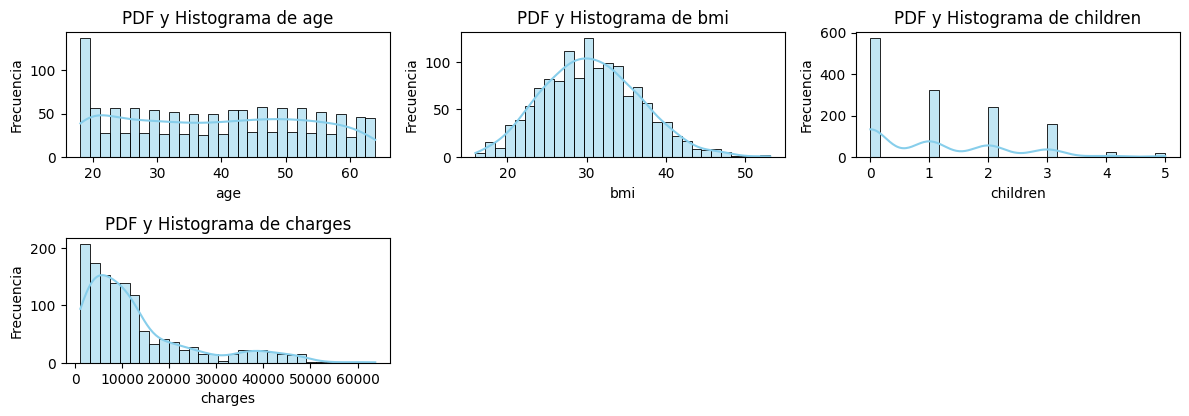

In [7]:
### Lista de columnas
columns = df.select_dtypes(include=['float64', 'int64']).columns

### Crear histogramas
plt.figure(figsize= (12, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'PDF y Histograma de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()


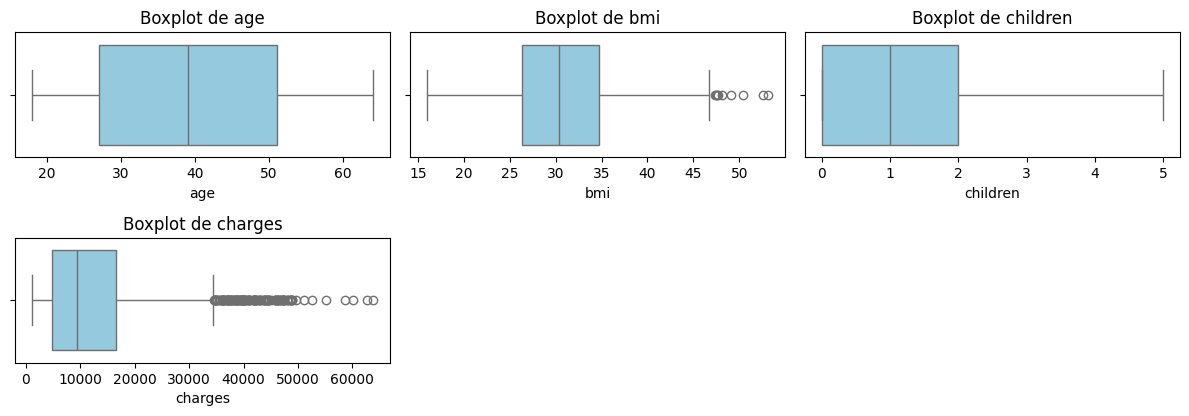

In [8]:
### Lista de columnas
columns = df.select_dtypes(include=['float64', 'int64']).columns

### Crear boxplots

plt.figure(figsize= (12, 10))

for i, col in enumerate(columns, 1):
  plt.subplot(5, 3, i)
  sns.boxplot(x=df[col], color='skyblue')
  plt.title(f'Boxplot de {col}', fontsize=12)
  plt.xlabel(col, fontsize=10)


plt.tight_layout()
plt.show()

In [41]:
### Calcular medidas de tendencia central y dispersión.
columns = df.select_dtypes(include=['float64', 'int64']).columns

#print(df.isnull().sum())

for col in columns:
  print(f"\n📊 Estadísticas para '{col}':")

  media = df[col].mean()
  print(f"Media: {media:.2f}")

  mediana = df[col].median()
  print(f"Mediana: {mediana:.2f}")

  moda = df[col].mode().iloc[0]
  print(f"Moda: {moda:.2f}")




📊 Estadísticas para 'age':
Media: 39.21
Mediana: 39.00
Moda: 18.00

📊 Estadísticas para 'bmi':
Media: 30.66
Mediana: 30.40
Moda: 32.30

📊 Estadísticas para 'children':
Media: 1.09
Mediana: 1.00
Moda: 0.00

📊 Estadísticas para 'charges':
Media: 13270.42
Mediana: 9382.03
Moda: 1639.56


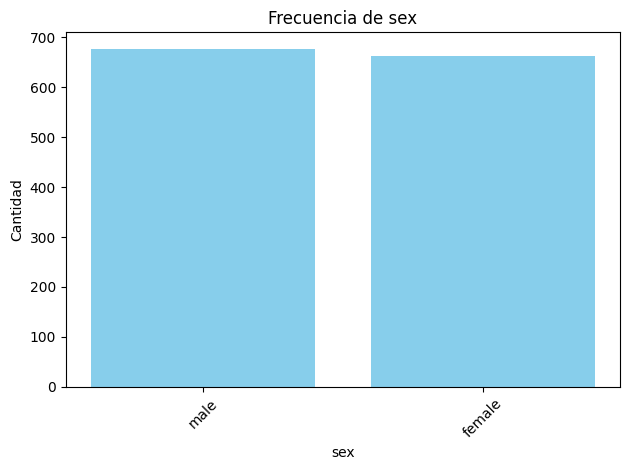

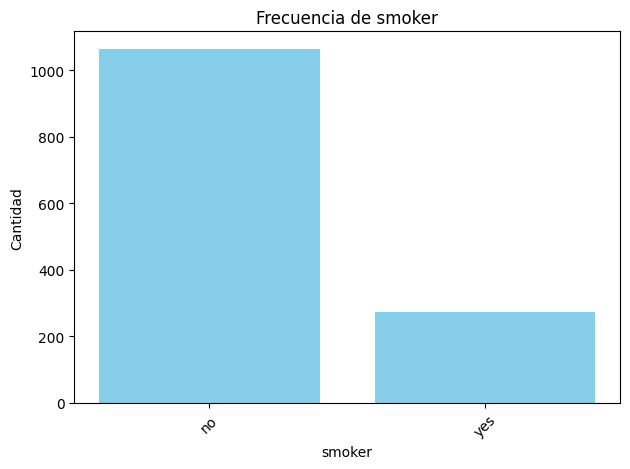

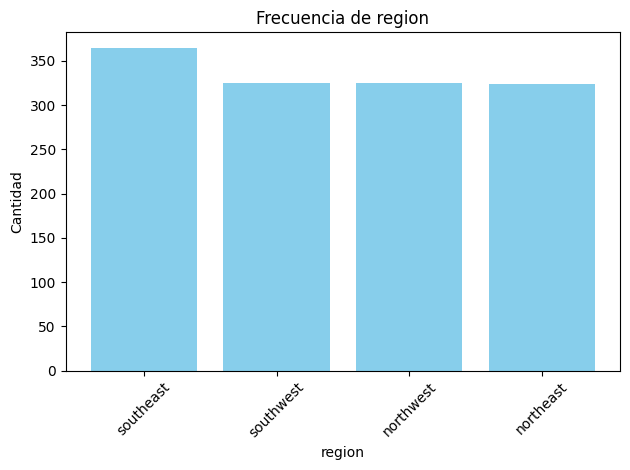

In [28]:
### Variables categoricas

var_cat = df[['sex', 'smoker', 'region']]
#print(var_cat)

### Graficar frecuencias
for i, col in enumerate(var_cat.columns, 1):
    frecuencia = df[col].value_counts()

    #plt.subplot(3, 1, i)  # 1 fila, 3 columnas, posición i
    plt.bar(frecuencia.index, frecuencia.values, color='skyblue')
    plt.title(f'Frecuencia de {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


##  **🔹 Paso 3: Matriz de Correlación**  

✅ Calcular la matriz de correlación **solo para variables numéricas**.  
✅ Generar un **mapa de calor** para visualizar relaciones.  


Matriz de correlación:
                age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


<Axes: >

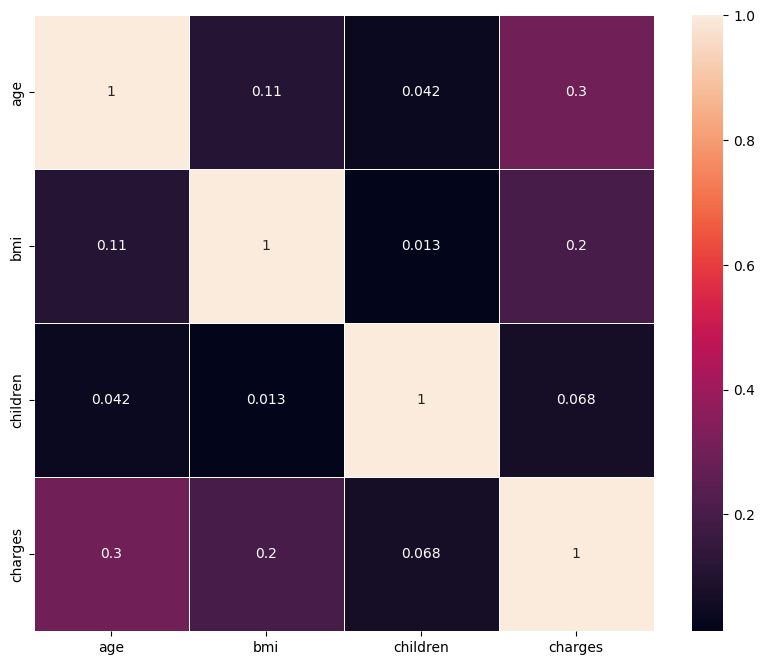

In [11]:
### Lista de columnas
columns2 = df.select_dtypes(include=['float64', 'int64'])

matriz_corr = columns2.corr()

print('Matriz de correlación:\n', matriz_corr)


### Heatmap

plt.figure(figsize= (10,8))
sns.heatmap(matriz_corr, annot= True, linewidths= 0.5)



📌 **Pregunta:** ¿Qué variables están más correlacionadas con el target (`charges`)? (salida del dataset)  

Las variables mas relacionadas son age y bmi, por ejemplo conforme aumenta la edad aumenta el costo de los gastos medicos.



## **🔹 Paso 4: Preprocesamiento**  
🔧 **Tareas:**  
1. Manejar valores faltantes con `SimpleImputer`.  
2. Codificar variables categóricas con `OneHotEncoder`.  
3. Estandarizar variables numéricas con `StandardScaler`.  
✅ Verificar que el dataset transformado no tenga valores nulos.  


In [45]:
### SimpleImputer

from sklearn.impute import SimpleImputer

columns2 = df.select_dtypes(include=['float64', 'int64'])

imputer = SimpleImputer(strategy='mean')


apply_imputer = pd.DataFrame(imputer.fit_transform(columns2), columns=columns2.columns)

df[columns2.columns] = apply_imputer


# Verificar que no hay valores nulos
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [48]:
### OneHotEncoder

from sklearn.preprocessing import OneHotEncoder


### Variables categoricas

var_cat = df.select_dtypes(include='object')

encoder = OneHotEncoder(sparse_output= False)

one_hot_encoded = encoder.fit_transform(df[var_cat])

ValueError: Boolean array expected for the condition, not object